   Year  Ratings  Genre      Gross       Budget  Screens  Sequel  Sentiment  \
0  2014      6.3      8       9130    4000000.0     45.0       1          0   
1  2014      7.1      1  192000000   50000000.0   3306.0       2          2   
2  2014      6.2      1   30700000   28000000.0   2872.0       1          0   
3  2014      6.3      1  106000000  110000000.0   3470.0       2          0   
4  2014      4.7      8   17300000    3500000.0   2310.0       2          0   

     Views  Likes  Dislikes  Comments  Aggregate Followers  
0  3280543   4632       425       636              1120000  
1   583289   3465        61       186             12350000  
2   304861    328        34        47               483000  
3   452917   2429       132       590               568000  
4  3145573  12163       610      1082              1923800  
              Year     Ratings       Genre         Gross        Budget  \
count   196.000000  196.000000  196.000000  1.960000e+02  1.950000e+02   
mean   2014

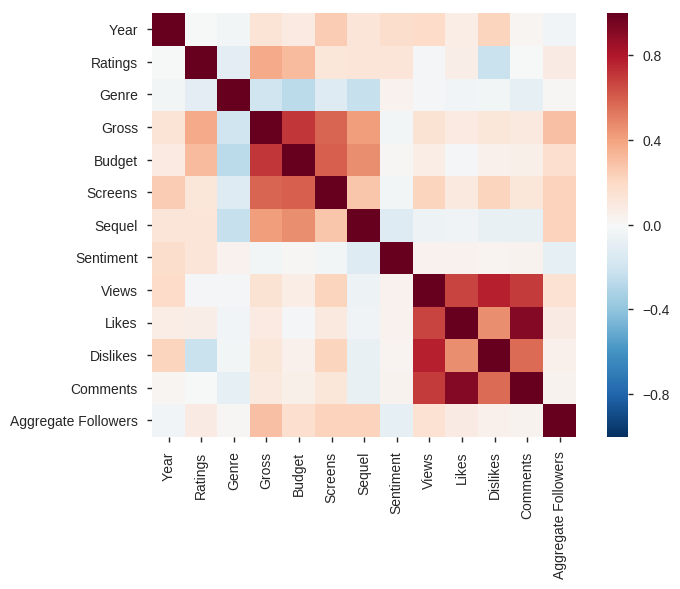

In [166]:
!pip install -q xlrd
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
file = 'movie.xlsx'
df = pd.read_excel(file)
del df['Movie'] # we drop the movie attribute as it is not relevant

print(df.head())
print(df.describe())
df.fillna(value=0,axis=1,inplace=True) #to fill NA values with 0
print(df.isnull().any()) # to check if there are any null values present
print(df.shape)

sns.heatmap(df.corr(), vmax=1, square = True) # this plots the correlation map which will be used in feature selection
scaler = MinMaxScaler() # we scale the values  to help train the model better
scaler.fit(df)    
scaler.transform(df)
print(df.head())

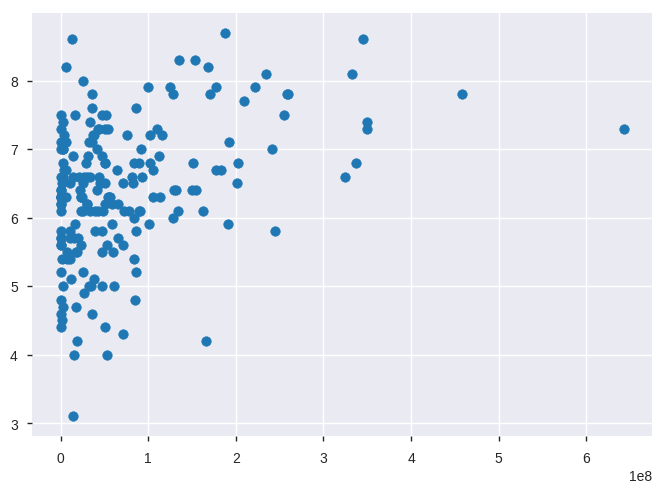

In [167]:

plt.scatter((df['Gross']),df['Ratings'])


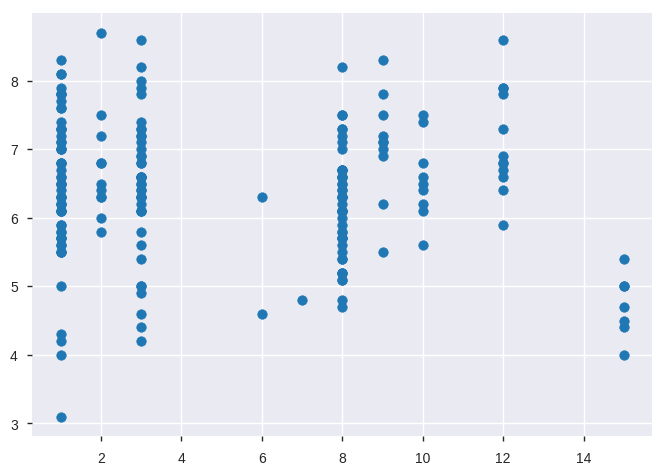

In [168]:
plt.scatter((df['Genre']),df['Ratings'])

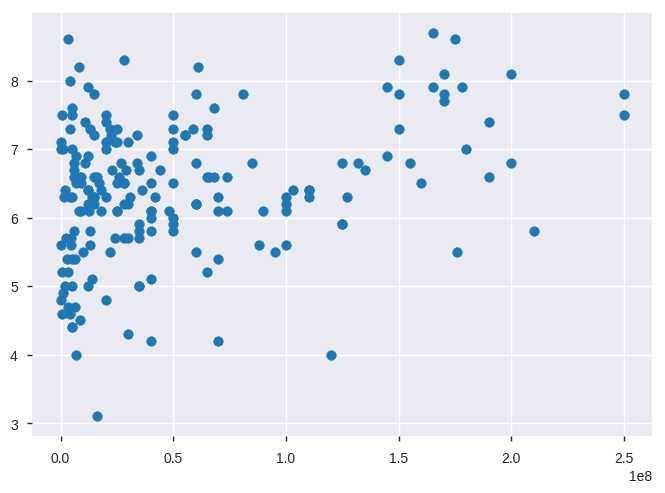

In [169]:
plt.scatter((df['Budget']),df['Ratings'])

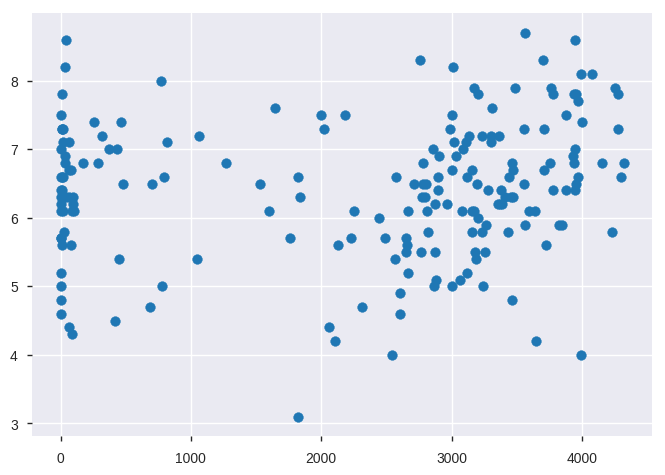

In [170]:
plt.scatter((df['Screens']),df['Ratings'])

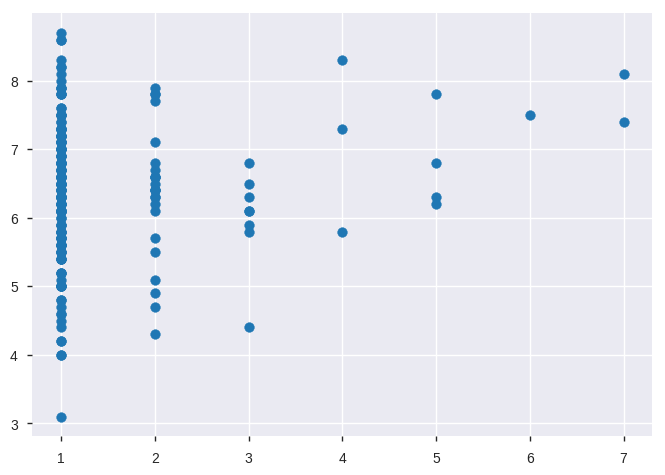

In [171]:
plt.scatter((df['Sequel']),df['Ratings'])

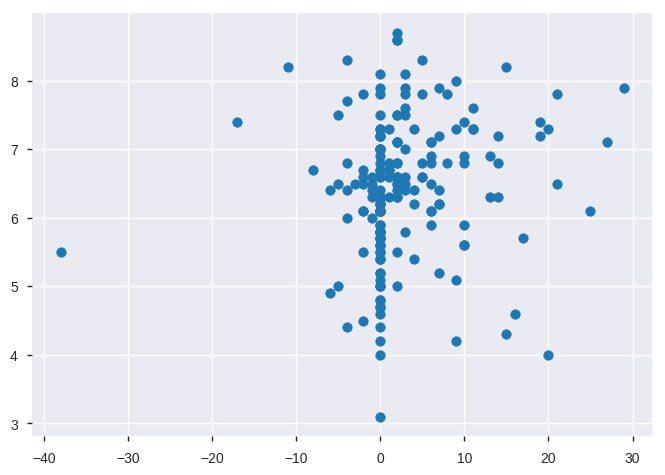

In [172]:

plt.scatter((df['Sentiment']),df['Ratings'])

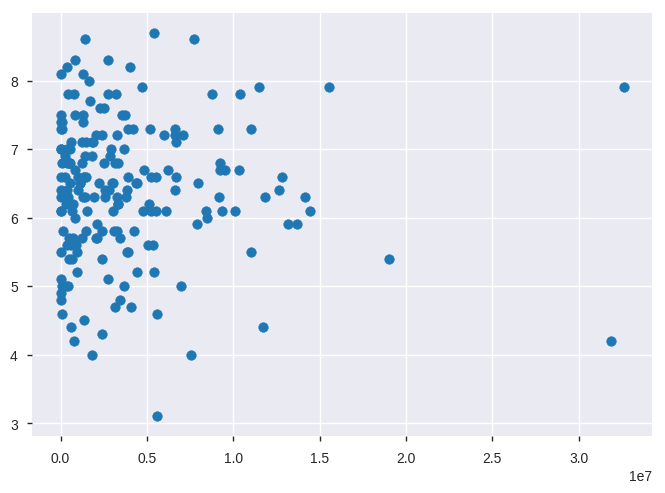

In [173]:
plt.scatter((df['Views']),df['Ratings'])

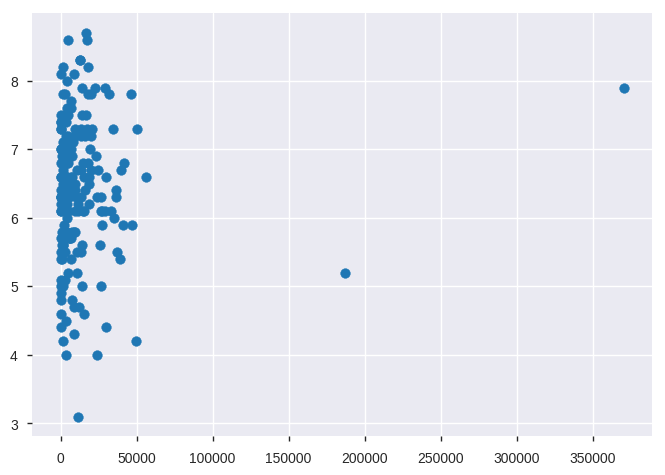

In [174]:
plt.scatter((df['Likes']),df['Ratings'])

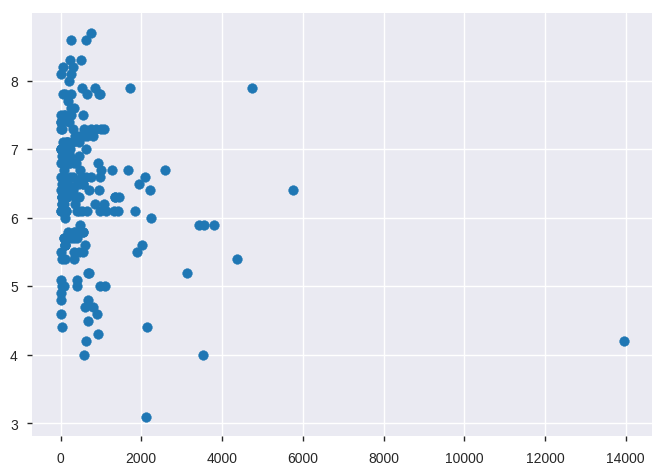

In [175]:
plt.scatter((df['Dislikes']),df['Ratings'])

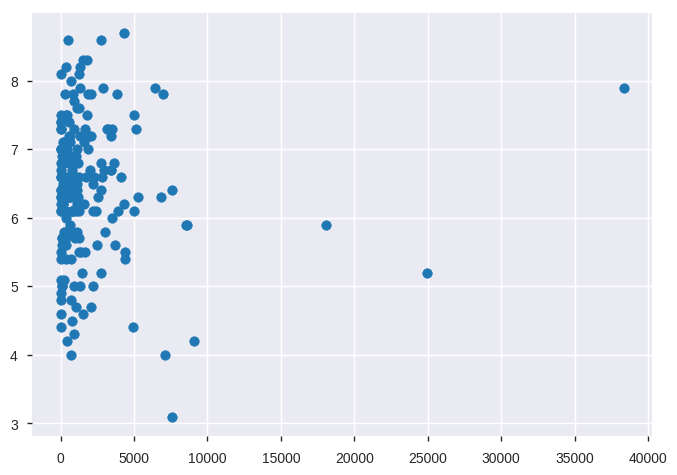

In [176]:

plt.scatter((df['Comments']),df['Ratings'])

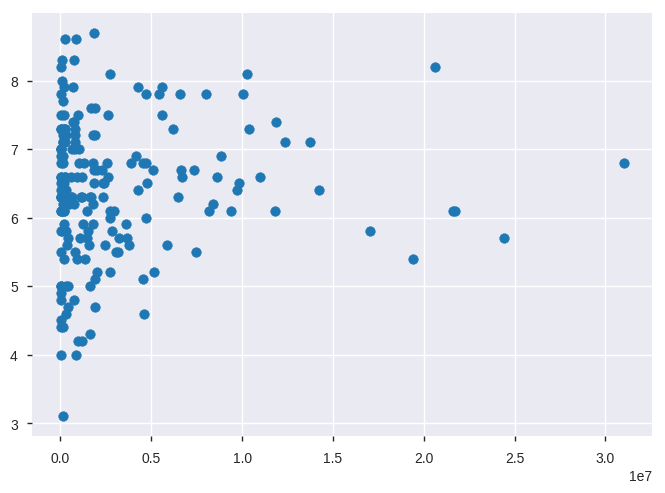

In [177]:

plt.scatter((df['Aggregate Followers']),df['Ratings'])

In [0]:
# From the above scatter plots and the correlation maps we can choose the following features
# Budget,Gross,Screen,sequel,sentiment, Aggregate followers

In [0]:
features = ['Budget','Gross','Screens','Sequel','Sentiment','Aggregate Followers'] #we have selected the features based on scatter plots
target = ['Ratings']

In [180]:
import pandas_profiling #this is an awesome function which helps us understand the data better in a visual way
pandas_profiling.ProfileReport(df)

Number of variables,13
Number of observations,196
Total Missing (%),0.0%
Total size in memory,20.0 KiB
Average record size in memory,104.4 B
Numeric,11
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [0]:
from sklearn import linear_model
import sklearn
from sklearn import metrics
alphas = 10**np.linspace(10,-2,100)*0.5

ridge_training= []
ridge_alpha = []
lasso_training = []
for i in range(10): # what happens here is for each iteration the data gets randomized giving a different training and testing value
  train, test = train_test_split(df, test_size=0.30) # here I have used train:70% ,test:30%
  X_train = train[features].dropna() #this is to drop all na values
  y_train = train[target].dropna()
  X_test = test[features].dropna()
  y_test = test[target].dropna()
  X_train.shape,y_train.shape
  # Fit a ridge regression cv on the training data
  ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True) #here we use cross validation to pick the best alpha
  ridgecv.fit(X_train, y_train)
  pred_train_ridge = ridgecv.predict(X_train)
  ridge_training.append(metrics.mean_squared_error(y_train,pred_train_ridge))
  ridge_alpha.append(ridgecv.alpha_)
  lassocv = LassoCV(alphas = None, cv = 10 , max_iter = 100000, normalize = True)
  lassocv.fit(X_train, y_train.values.ravel())
  #training error:
  pred_train = lassocv.predict(X_train)
  lasso_training.append(metrics.mean_squared_error(y_train,pred_train))


  

In [0]:
ridge_alpha
ridge_average_alpha= np.mean(ridge_alpha)

In [207]:
 ridge_training #this gives the training error over 10 iterations of ridge cv

[0.7881929303429517,
 0.8775353560078963,
 0.9533822025745563,
 0.7930800430101422,
 0.8600522938561084,
 0.8476387024067866,
 0.630937083750908,
 0.8453861237610784,
 0.7651134766523846,
 0.8379282671249868]

In [208]:
print(np.mean(ridge_training)) #computes the mean of the ridge training error

0.81992464794878


In [209]:
print(np.var(ridge_training)) #computes the variance of the ridge training error

0.00649287250411674


In [210]:
lasso_training #this gives the training error over 10 iterations of the lasso cv

[0.7973142477137906,
 0.876233736487658,
 0.9498571202628208,
 0.7958390263525184,
 0.8836035548871436,
 0.882123413538719,
 0.6820857610469802,
 0.8417720288838751,
 0.7669584438941827,
 0.8420668891996114]

In [211]:
print(np.mean(lasso_training)) #computes the average of lasso training error

0.8317854222267298


In [212]:
print(np.var(lasso_training)) #variance of the lasso training error

0.0050433982560848635


In [213]:
ridge = Ridge(alpha =ridge_average_alpha, normalize = True) # here we use the alpha from the avergae of 10 iterations
ridge.fit(X_train, y_train) # we fit the ridge regression model to the train data
metrics.mean_squared_error(y_test, ridge.predict(X_test)) #MSE of  ridge regression on test data

0.7535091535770152

In [201]:
lassocv.alpha_ #this is the best alpha value from the lasso regrssion

0.0037589275084392968

In [214]:
lasso = Lasso(max_iter = 1000000, normalize = True,alpha = lassocv.alpha_)
lasso.fit(X_train, y_train.values.ravel())#fitting the data on train set
metrics.mean_squared_error(y_test, lasso.predict(X_test))#MSE of the testing data using lasso

0.763003939804965